# Analysis of Quality Negative Samples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

ns_qual_analysis_dir = "output/NS_quality_analysis"

### Get a list with all available files with outsaved SNS/NSN minus distances

In [45]:
ns_qual_analysis_files = glob(ns_qual_analysis_dir + "/*/*/*.npz", recursive=True)
ns_qual_analysis_files

['output/NS_quality_analysis\\ESNSRelaxed_jaccard_similarity-20220725T140537Z-001\\ESNSRelaxed_jaccard_similarity\\triple_10576_after_epoch_20.npz',
 'output/NS_quality_analysis\\ESNSRelaxed_jaccard_similarity-20220725T140537Z-001\\ESNSRelaxed_jaccard_similarity\\triple_10576_after_epoch_40.npz',
 'output/NS_quality_analysis\\ESNSRelaxed_jaccard_similarity-20220725T140537Z-001\\ESNSRelaxed_jaccard_similarity\\triple_10576_after_epoch_60.npz',
 'output/NS_quality_analysis\\ESNSRelaxed_jaccard_similarity-20220725T140537Z-001\\ESNSRelaxed_jaccard_similarity\\triple_106931_after_epoch_20.npz',
 'output/NS_quality_analysis\\ESNSRelaxed_jaccard_similarity-20220725T140537Z-001\\ESNSRelaxed_jaccard_similarity\\triple_106931_after_epoch_40.npz',
 'output/NS_quality_analysis\\ESNSRelaxed_jaccard_similarity-20220725T140537Z-001\\ESNSRelaxed_jaccard_similarity\\triple_106931_after_epoch_60.npz',
 'output/NS_quality_analysis\\ESNSRelaxed_jaccard_similarity-20220725T140537Z-001\\ESNSRelaxed_jaccard_

### Decide what to plot

In [53]:
files_to_plot = range(3,6)
curve_descriptions = ["after 20 epochs", "after 40 epochs", "after 60 epochs"]
plot_title = "Distribution of negative samples for triple_106931"

### CCDF plot

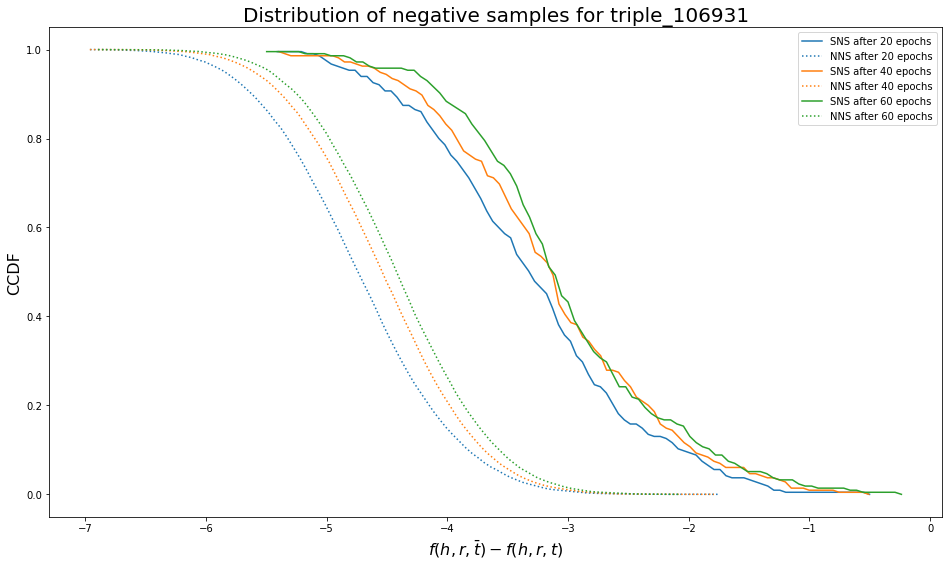

In [54]:
plt.figure(figsize=(16,9))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_index = 0
for f in range(len(ns_qual_analysis_files)):
    if f in files_to_plot:
        minus_distances = dict(np.load(ns_qual_analysis_files[f]))
        count_sns, bins_count_sns = np.histogram(minus_distances['sns'], bins=100)
        count_nns, bins_count_nns = np.histogram(minus_distances['nns'], bins=100)
        
        pdf_sns = count_sns / sum(count_sns)
        pdf_nns = count_nns / sum(count_nns)

        cdf_sns = np.cumsum(pdf_sns)
        cdf_nns = np.cumsum(pdf_nns)

        plt.plot(bins_count_sns[1:], 1-cdf_sns, label="SNS {}".format(curve_descriptions[color_index]), color=colors[color_index])
        plt.plot(bins_count_nns[1:], 1-cdf_nns, label="NNS {}".format(curve_descriptions[color_index]), color=colors[color_index], linestyle="dotted")

        plt.legend()
        plt.title(plot_title, fontsize=20)
        plt.xlabel(r"$f(h, r, \bar{t}) - f(h, r, t)$", fontsize=16)
        plt.ylabel("CCDF", fontsize=16)

        color_index += 1

In [18]:
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']